In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')
#
df = pd.DataFrame.from_csv('2013_movies.csv',sep=',',header=0,index_col=None,
                           parse_dates=[6],infer_datetime_format=True)
print df.head()

                             Title     Budget  DomesticTotalGross  \
0  The Hunger Games: Catching Fire  130000000           424668047   
1                       Iron Man 3  200000000           409013994   
2                           Frozen  150000000           400738009   
3                  Despicable Me 2   76000000           368061265   
4                     Man of Steel  225000000           291045518   

                    Director Rating  Runtime ReleaseDate  
0           Francis Lawrence  PG-13      146  2013-11-22  
1                Shane Black  PG-13      129  2013-05-03  
2     Chris BuckJennifer Lee     PG      108  2013-11-22  
3  Pierre CoffinChris Renaud     PG       98  2013-07-03  
4                Zack Snyder  PG-13      143  2013-06-14  


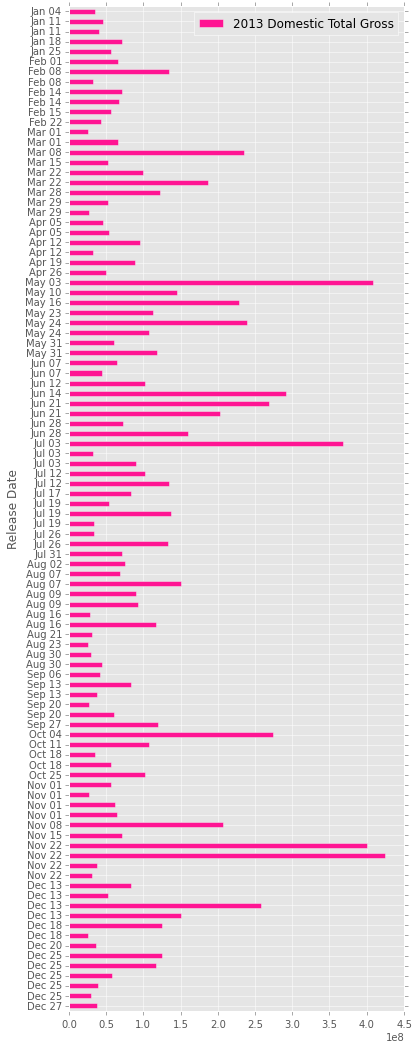

In [2]:
'''
Challenge 1:
Plot domestic total gross over time;
we interpret this as Domestic Total Gross versus Release Date, for the 2013 movie data.
'''
df2 = df.sort( columns='ReleaseDate', ascending=False )
df2['ReleaseDate'] = df2['ReleaseDate'].apply( lambda x: x.strftime("%b %d") )
df2 = df2.rename(columns = {'ReleaseDate':'Release Date', 'DomesticTotalGross':'2013 Domestic Total Gross'})
df3 = df2[['Release Date','2013 Domestic Total Gross']].set_index('Release Date')
df3.plot(figsize=(6,18), kind='barh', color="DeepPink")

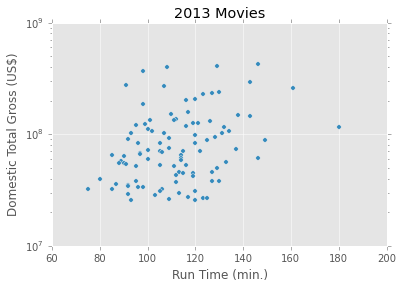

In [3]:
'''
Challenge 2:
Plot runtime versus domestic total gross;
Here we'll make a scatter plot.
'''
df.plot(x="Runtime",y="DomesticTotalGross",kind="scatter",title="2013 Movies",logy=True)
plt.xlabel("Run Time (min.)")
plt.ylabel("Domestic Total Gross (US\$)")
plt.show()

In [4]:
'''
Challenge 3:
Group your data by Rating and find the average runtime 
and domestic total gross at each level of Rating.
'''
df2 = df[["Rating","Runtime","DomesticTotalGross"]]
by_rating = df2.groupby(["Rating"]).mean()
print by_rating

           Runtime  DomesticTotalGross
Rating                                
G       107.000000        2.684928e+08
PG       99.933333        1.311357e+08
PG-13   117.510638        1.114498e+08
R       110.729730        6.989243e+07


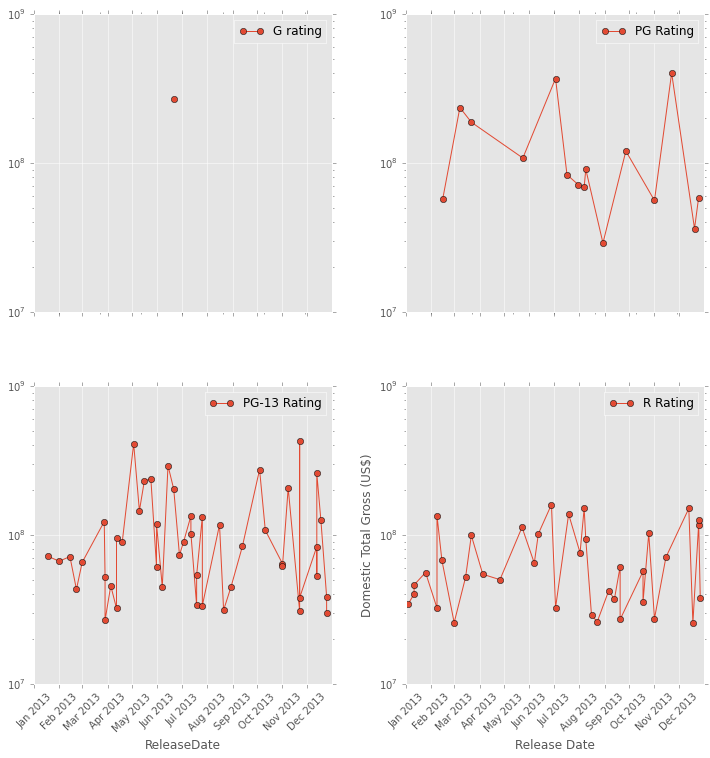

In [27]:
'''
Challenge 4:
Make one figure with (N=the number of MPAA ratings there are) subplots, 
and in each plot the release date vs the domestic total gross.

I CAN MAKE X-AXIS LABELS APPEAR ON THE TWO BOTTOM PLOTS, BUT NOT ON THE
TWO TOP ONES... WHY???

ALSO, THE PLT.XLABEL AND PLT.YLABEL METHODS DON'T WORK ON THE FIRST THREE PLOTS...
'''
import datetime 
df2 = df.sort( columns='ReleaseDate', ascending=True )
df2['ReleaseDate'] = df2['ReleaseDate'].apply( lambda x: x.date() )
#
fig, axes = plt.subplots( nrows=2, ncols=2, figsize=(12,12))
plt.subplots_adjust(wspace=0.25,hspace=0.25)
df2[df2["Rating"]=="G"].plot(ax=axes[0,0],y="DomesticTotalGross",x="ReleaseDate",style="-o",
                             logy=True,ylim=(1.0E+07,1.0E+09),rot=45,
                             xlim=(datetime.date(2013,1,1),datetime.date(2013,12,31))).legend(["G rating"])
plt.xlabel("Release Date")
plt.ylabel("Domestic Total Gross (US\$)")
df2[df2["Rating"]=="PG"].plot(ax=axes[0,1],y="DomesticTotalGross",x="ReleaseDate",style="-o",
                              logy=True,ylim=(1.0E+07,1.0E+09),rot=45,
                              xlim=(datetime.date(2013,1,1),datetime.date(2013,12,31))).legend(["PG Rating"])
plt.xlabel("Release Date")
plt.ylabel("Domestic Total Gross (US\$)")
df2[df2["Rating"]=="PG-13"].plot(ax=axes[1,0],y="DomesticTotalGross",x="ReleaseDate",style="-o",
                                 logy=True,ylim=(1.0E+07,1.0E+09),rot=45,
                                 xlim=(datetime.date(2013,1,1),datetime.date(2013,12,31))).legend(["PG-13 Rating"])
plt.xlabel("Release Date")
plt.ylabel("Domestic Total Gross (US\$)")
df2[df2["Rating"]=="R"].plot(ax=axes[1,1],y="DomesticTotalGross",x="ReleaseDate",style="-o",
                             logy=True,ylim=(1.0E+07,1.0E+09),rot=45,
                             xlim=(datetime.date(2013,1,1),datetime.date(2013,12,31))).legend(["R Rating"])
plt.xlabel("Release Date")
plt.ylabel("Domestic Total Gross (US\$)")

In [5]:
'''
Challenge 5:
What director in your dataset has the highest gross per movie?
'''
df2 = df[["Director","DomesticTotalGross"]]
by_director = df2.groupby(["Director"]).mean()
highest_gross_director = by_director.idxmax(axis=0,skipna=True)
print highest_gross_director[0]

Francis Lawrence


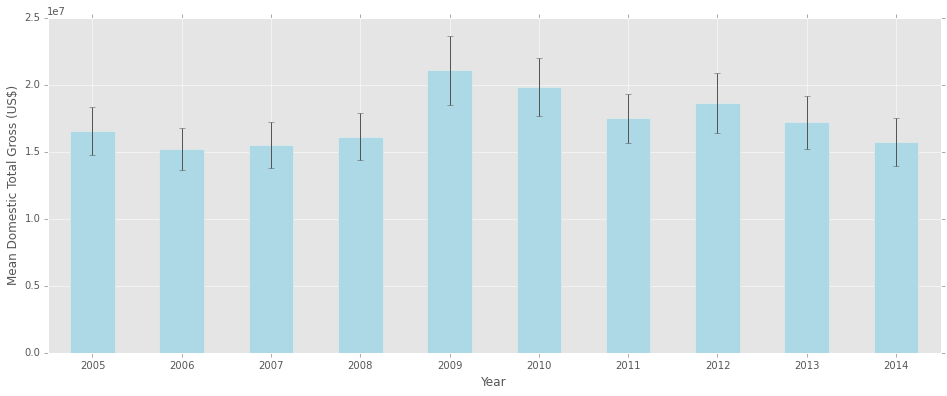

In [6]:
'''
Challenge 6:
Bin your dataset into years (if applicable) 
and make a bar graph with error bars of gross each year.
This is the only challenge where I used my own data files.
'''
%matplotlib inline
import pickle
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
#
movie_num = 0
yearly_gross = {}
years = [2005,2006,2007,2008,2009,2010,2011,2012,2013,2014]
for this_year in years:
    with open(str(this_year)+'_all_movie_dict.pkl', 'r') as f:
        movie_dict = pickle.load(f)
    for movie in movie_dict.values():
        dtotal_str = re.compile('[,\$]').sub("", str(movie["Domestic Total"]))
        dtotal = float(dtotal_str) if dtotal_str!='None' else float('nan')
        movie_num += 1
        yearly_gross[movie_num] = [this_year,dtotal]
#
df = pd.DataFrame(yearly_gross).T
df[0] = df[0].astype(np.int64)      # Convert column of years to integers, for display purposes
year_groups   = df.groupby([0])     # Group by years
yearly_means  = year_groups.mean()
yearly_errors = year_groups.sem()
yearly_means.plot(figsize=(16,6), kind='bar', logy=False, color="LightBlue", 
                  rot=0, yerr=yearly_errors, legend=False)
plt.xlabel("Year")
plt.ylabel("Mean Domestic Total Gross (US\$)")
plt.show()